In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

survived : survival

- 0 -> no, 1 -> yes

pclass : Ticket class

 - 1 = 1st, 2 = 2nd, 3 = 3rd

sibsp : number of siblings / spouses aboard the Titanic

parch : number of parents / children aboard the Titanic

ticket : Ticket number

fare : Passenger fare

cabin : Cabin number

embarked : Port of Embarkation 

- C = Cherbourg, Q = Queenstown, S = Southampton

In [2]:
train = pd.read_csv('/content/drive/MyDrive/train_titanic.csv')
test = pd.read_csv('/content/drive/MyDrive/test_titanic.csv')

In [3]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [17]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [4]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [18]:
test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [5]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [6]:
train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [7]:
train.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [9]:
train.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [10]:
train.Cabin.value_counts()

G6             4
C23 C25 C27    4
B96 B98        4
E101           3
F33            3
              ..
B78            1
A26            1
C104           1
E40            1
C70            1
Name: Cabin, Length: 147, dtype: int64

In [40]:
train.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [14]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

# Sex

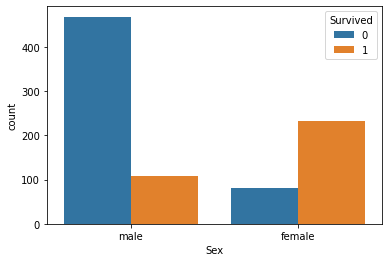

In [13]:
sns.countplot(data = train, x = train.Sex, hue = train.Survived)

남성이 여성보다 사망률이 높다.

# Pclass

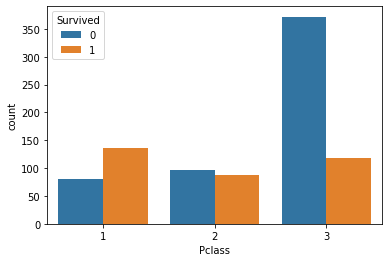

In [45]:
sns.countplot(data = train, x = train.Pclass, hue = train.Survived)

Pclass 가 3인 사람들의 사망률이 가장높다.

#SibSp

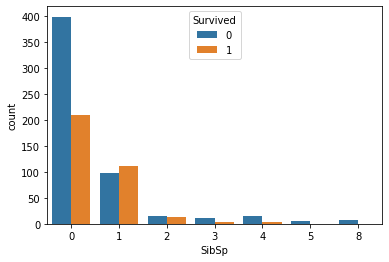

In [15]:
sns.countplot(data = train, x = train.SibSp, hue = train.Survived)

형제나 배우자와 같이 안 탄 사람이 같이 탄 사람보다 사망률이 높다.

# Parch

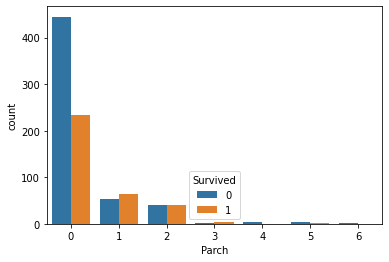

In [16]:
sns.countplot(data = train, x = train.Parch, hue = train.Survived)

부모와 자식과 같이 안 탄 사람이 같이 탄 사람보다 사망률이 높다.

# Embarked

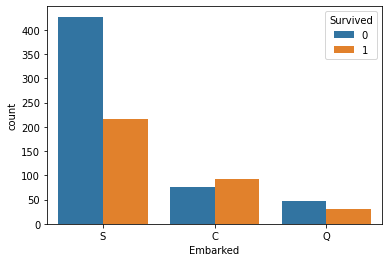

In [19]:
sns.countplot(data = train, x = train.Embarked, hue = train.Survived)

Embarked 가 S인 사람들의 사망률이 가장 높다.

## Age 

범주화

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


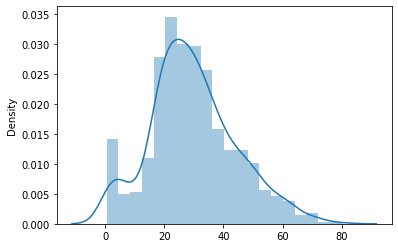

In [21]:
sns.distplot(x = train.Age)

In [54]:
train['Age'] = train['Age'].fillna(np.mean(train['Age']))
test['Age'] = test['Age'].fillna(np.mean(test['Age']))

In [61]:
train.loc[train['Age'] < 10, 'age_bin'] = 0
train.loc[(train['Age'] >= 10) & (train['Age'] < 20) , 'age_bin'] = 1
train.loc[(train['Age'] >= 20) & (train['Age'] < 30) , 'age_bin'] = 2
train.loc[(train['Age'] >= 30) & (train['Age'] < 40) , 'age_bin'] = 3
train.loc[(train['Age'] >= 40) & (train['Age'] < 50) , 'age_bin'] = 4
train.loc[train['Age'] >= 50 , 'age_bin'] = 5

test.loc[test['Age'] < 10, 'age_bin'] = 0
test.loc[(test['Age'] >= 10) & (test['Age'] < 20) , 'age_bin'] = 1
test.loc[(test['Age'] >= 20) & (test['Age'] < 30) , 'age_bin'] = 2
test.loc[(test['Age'] >= 30) & (test['Age'] < 40) , 'age_bin'] = 3
test.loc[(test['Age'] >= 40) & (test['Age'] < 50) , 'age_bin'] = 4
test.loc[test['Age'] >= 50 , 'age_bin'] = 5  



train['age_bin'] = train['age_bin'].astype('int64')
test['age_bin'] = test['age_bin'].astype('int64')

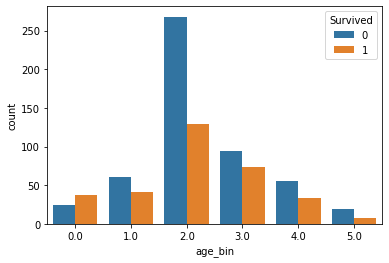

In [30]:
sns.countplot(data = train, x = train.age_bin, hue = train.Survived)

20대의 사망률이 가장높고 어린아이들의 사망률이 가장 낮다.

# Fare

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


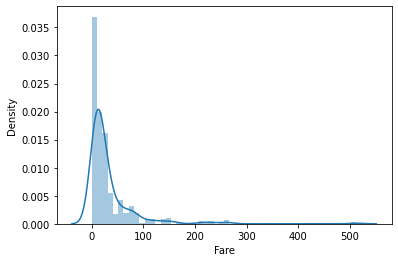

In [112]:
sns.distplot(train.Fare)

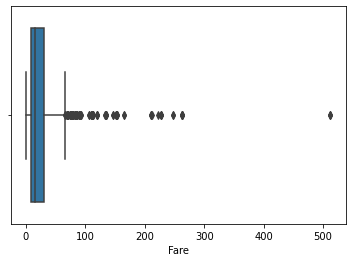

In [113]:
sns.boxplot(data = train, x = train.Fare)

In [114]:
train.loc[train['Fare'] >= 100]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bin,name_1,ticket,동승자
27,28,0,1,"Fortune, Mr. Charles Alexander",1,19.000000,3,2,19950,263.0000,C23 C25 C27,2,1,12,19950,5
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",0,29.699118,1,0,PC 17569,146.5208,B78,0,2,13,17569,1
88,89,1,1,"Fortune, Miss. Mabel Helen",0,23.000000,3,2,19950,263.0000,C23 C25 C27,2,2,9,19950,5
118,119,0,1,"Baxter, Mr. Quigg Edmond",1,24.000000,0,1,PC 17558,247.5208,B58 B60,0,2,12,17558,1
195,196,1,1,"Lurette, Miss. Elise",0,58.000000,0,0,PC 17569,146.5208,B80,0,5,9,17569,0
215,216,1,1,"Newell, Miss. Madeleine",0,31.000000,1,0,35273,113.2750,D36,0,3,9,35273,1
258,259,1,1,"Ward, Miss. Anna",0,35.000000,0,0,PC 17755,512.3292,NaN,0,3,9,17755,0
268,269,1,1,"Graham, Mrs. William Thompson (Edith Junkins)",0,58.000000,0,1,PC 17582,153.4625,C125,2,5,13,17582,1
269,270,1,1,"Bissette, Miss. Amelia",0,35.000000,0,0,PC 17760,135.6333,C99,2,3,9,17760,0
297,298,0,1,"Allison, Miss. Helen Loraine",0,2.000000,1,2,113781,151.5500,C22 C26,2,0,9,113781,3


# Sex, Embarked 라벨 인코딩

In [34]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
train['Sex'] = label.fit_transform(train['Sex'])


In [37]:
test['Sex'] = label.fit_transform(test['Sex'])

In [39]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bin
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,S,2.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,C,3.0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,S,2.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,S,3.0
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,S,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,S,2.0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,S,1.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN,S,2.0
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,C,2.0


In [41]:
# Embarked 결측치 최빈값인 S로 채워줌
train['Embarked'] = train['Embarked'].fillna('S')

In [42]:
train['Embarked'] = label.fit_transform(train['Embarked'])
test['Embarked'] = label.fit_transform(test['Embarked'])

# 상관계수

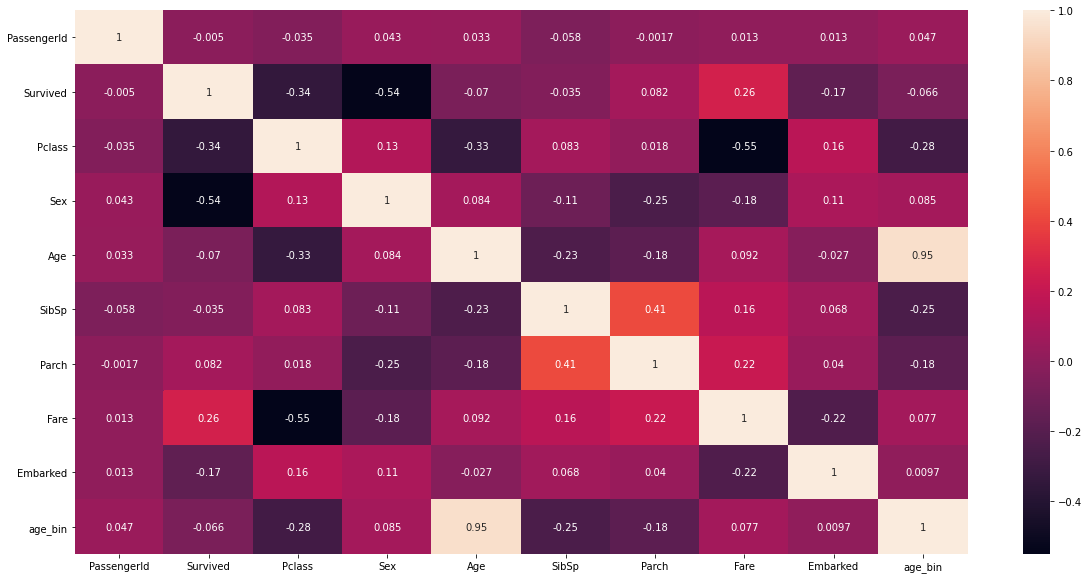

In [44]:
corr = train.corr()
fig, ax = plt.subplots(figsize = (20, 10))
sns.heatmap(corr, annot = True)

타겟인 Survived와의 상관계수는 Sex가 가장 높고 그다음으로 Pclass, Fare가 높다.

# 모델

In [46]:
!pip install catboost

     |████████████████████████████████| 69.2MB 39kB/s 


In [62]:
train_data = train.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin', 'Age'], axis = 1)

train_target = train.Survived

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    891 non-null    int64  
 1   Sex       891 non-null    int64  
 2   SibSp     891 non-null    int64  
 3   Parch     891 non-null    int64  
 4   Fare      891 non-null    float64
 5   Embarked  891 non-null    int64  
 6   age_bin   891 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 48.9 KB


In [63]:
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from catboost import CatBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, recall_score, f1_score
from sklearn.model_selection import train_test_split


models = {
    'Catboost' : CatBoostClassifier(),
    'Xgboost' : XGBClassifier(),
    'lightgbm' : LGBMClassifier(),
    'Logistic' : LogisticRegression(),
    'DecisionTree' : DecisionTreeClassifier(),
    'RandomForest' : RandomForestClassifier()
}



for key, classifier in models.items() :
  X_train, X_test, y_train, y_test = train_test_split(train.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin', 'Age'], axis = 1), train['Survived'], test_size = 0.2, random_state = 42)
  model = classifier
  model.fit(X_train, y_train)
  print(key)
  print('ACC : ', round(model.score(X_test, y_test), 4) * 100, '%')
  y_pred = model.predict(X_test)
  print('roc_auc_score : ', round(roc_auc_score(y_test,y_pred), 4) * 100, '%')
  print('recall_score : ', round(recall_score(y_test,y_pred), 4) * 100, '%')
  print('f1_score : ', round(f1_score(y_test, y_pred), 4) * 100 , '%' )
  print('-'*100)
  


Learning rate set to 0.008911
0:	learn: 0.6874852	total: 716us	remaining: 716ms
1:	learn: 0.6818932	total: 1.35ms	remaining: 675ms
2:	learn: 0.6755099	total: 2.4ms	remaining: 798ms
3:	learn: 0.6698606	total: 3.63ms	remaining: 904ms
4:	learn: 0.6650273	total: 4.28ms	remaining: 852ms
5:	learn: 0.6607388	total: 5.29ms	remaining: 877ms
6:	learn: 0.6555797	total: 6.43ms	remaining: 912ms
7:	learn: 0.6526371	total: 7.01ms	remaining: 869ms
8:	learn: 0.6478101	total: 7.81ms	remaining: 860ms
9:	learn: 0.6423607	total: 8.81ms	remaining: 872ms
10:	learn: 0.6376154	total: 9.86ms	remaining: 887ms
11:	learn: 0.6330671	total: 10.9ms	remaining: 901ms
12:	learn: 0.6285273	total: 12.2ms	remaining: 923ms
13:	learn: 0.6232217	total: 13.3ms	remaining: 935ms
14:	learn: 0.6190859	total: 14.2ms	remaining: 935ms
15:	learn: 0.6158838	total: 14.9ms	remaining: 915ms
16:	learn: 0.6116230	total: 15.8ms	remaining: 913ms
17:	learn: 0.6076032	total: 16.6ms	remaining: 907ms
18:	learn: 0.6033909	total: 17.6ms	remaining: 

# Name

In [84]:
import re

a = 'Braund, Mr. Owen Harris'
print(re.findall('([a-zA-Z]+)\.',a)[0])

train['name_1'] = train['Name'].apply(lambda x : re.findall('([a-zA-Z]+)\.', x)[0])
train



Mr


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bin,name_1
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,2,2,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,0,3,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,2,2,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,2,3,Mrs
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,2,3,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,2,2,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,2,1,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN,2,2,Miss
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,0,2,Mr


In [85]:
train['name_1'] = label.fit_transform(train['name_1'])

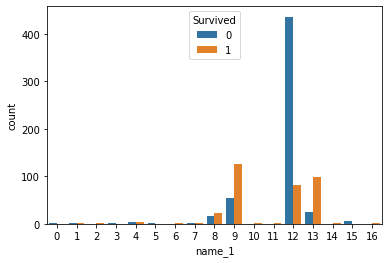

In [87]:
sns.countplot(data = train, x = train['name_1'], hue = train['Survived'])

In [88]:
for key, classifier in models.items() :
  X_train, X_test, y_train, y_test = train_test_split(train.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin', 'Age'], axis = 1), train['Survived'], test_size = 0.2, random_state = 42)
  model = classifier
  model.fit(X_train, y_train)
  print(key)
  print('ACC : ', round(model.score(X_test, y_test), 4) * 100, '%')
  y_pred = model.predict(X_test)
  print('roc_auc_score : ', round(roc_auc_score(y_test,y_pred), 4) * 100, '%')
  print('recall_score : ', round(recall_score(y_test,y_pred), 4) * 100, '%')
  print('f1_score : ', round(f1_score(y_test, y_pred), 4) * 100 , '%' )
  print('-'*100)
  


Learning rate set to 0.008911
0:	learn: 0.6868072	total: 1.12ms	remaining: 1.12s
1:	learn: 0.6814438	total: 1.8ms	remaining: 899ms
2:	learn: 0.6778770	total: 2.36ms	remaining: 784ms
3:	learn: 0.6726514	total: 3.07ms	remaining: 764ms
4:	learn: 0.6670527	total: 3.83ms	remaining: 762ms
5:	learn: 0.6620739	total: 4.7ms	remaining: 779ms
6:	learn: 0.6570114	total: 5.42ms	remaining: 768ms
7:	learn: 0.6530428	total: 6.07ms	remaining: 752ms
8:	learn: 0.6475326	total: 7.04ms	remaining: 775ms
9:	learn: 0.6429787	total: 7.66ms	remaining: 759ms
10:	learn: 0.6377749	total: 8.48ms	remaining: 763ms
11:	learn: 0.6335370	total: 9.06ms	remaining: 746ms
12:	learn: 0.6286536	total: 9.99ms	remaining: 758ms
13:	learn: 0.6243804	total: 10.9ms	remaining: 765ms
14:	learn: 0.6195386	total: 11.7ms	remaining: 769ms
15:	learn: 0.6159463	total: 12.5ms	remaining: 771ms
16:	learn: 0.6119948	total: 13.4ms	remaining: 773ms
17:	learn: 0.6087842	total: 14.3ms	remaining: 782ms
18:	learn: 0.6047964	total: 15.2ms	remaining: 

이름의 호칭을 분류해본 결과 정확도가 떨어지는 것도 있고 올라가는 것도 있다.

# Ticket

In [115]:
train['Ticket']

0             A/5 21171
1              PC 17599
2      STON/O2. 3101282
3                113803
4                373450
             ...       
886              211536
887              112053
888          W./C. 6607
889              111369
890              370376
Name: Ticket, Length: 891, dtype: object

Ticket 칼럼을 보면 뒤에가 다 숫자로 되어있다. 이를 분류해서 확인해보자.

In [90]:
a = 'STON/O2. 3101282'
a.split()

['STON/O2.', '3101282']

In [101]:
def ticket(x) :
  try :
    a = x.split()
    b = a[-1]
  except :
    b = x
  return b

train['ticket'] = train['Ticket'].apply(ticket)
sorted(train['ticket'])

['10482',
 '110152',
 '110152',
 '110152',
 '110413',
 '110413',
 '110413',
 '110465',
 '110465',
 '110564',
 '110813',
 '111240',
 '111320',
 '111361',
 '111361',
 '111369',
 '111426',
 '111427',
 '111428',
 '112050',
 '112052',
 '112053',
 '112058',
 '112059',
 '11206',
 '112277',
 '112379',
 '113028',
 '113043',
 '113050',
 '113051',
 '113055',
 '113056',
 '113059',
 '113501',
 '113503',
 '113505',
 '113505',
 '113509',
 '113510',
 '113514',
 '113572',
 '113572',
 '113760',
 '113760',
 '113760',
 '113760',
 '113767',
 '113773',
 '113776',
 '113776',
 '113781',
 '113781',
 '113781',
 '113781',
 '113783',
 '113784',
 '113786',
 '113787',
 '113788',
 '113789',
 '113789',
 '113792',
 '113794',
 '113796',
 '113798',
 '113798',
 '113800',
 '113803',
 '113803',
 '113804',
 '113806',
 '113806',
 '113807',
 '1166',
 '11668',
 '11668',
 '11751',
 '11751',
 '11752',
 '11753',
 '11755',
 '11765',
 '11767',
 '11767',
 '11769',
 '11771',
 '11774',
 '11813',
 '11967',
 '11967',
 '12233',
 '12460',

In [102]:
train.loc[train['ticket'] == 'LINE']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bin,name_1,ticket
179,180,0,3,"Leonard, Mr. Lionel",1,36.0,0,0,LINE,0.0,NaN,2,3,12,LINE
271,272,1,3,"Tornquist, Mr. William Henry",1,25.0,0,0,LINE,0.0,NaN,2,2,12,LINE
302,303,0,3,"Johnson, Mr. William Cahoone Jr",1,19.0,0,0,LINE,0.0,NaN,2,1,12,LINE
597,598,0,3,"Johnson, Mr. Alfred",1,49.0,0,0,LINE,0.0,NaN,2,4,12,LINE


Ticket 이 LINE인 사람들은 뭘까?

이들은 Pclass가 3이고 Fare가 0이고 Embarked가 2이다. 같이탄 동승자도 없다.

In [103]:
train.loc[train['ticket'] == 'LINE', 'ticket'] = 9999

In [104]:
train['ticket'] = train.ticket.astype('int64')

In [106]:
for key, classifier in models.items() :
  X_train, X_test, y_train, y_test = train_test_split(train.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin', 'Age'], axis = 1), train['Survived'], test_size = 0.2, random_state = 42)
  model = classifier
  model.fit(X_train, y_train)
  print(key)
  print('ACC : ', round(model.score(X_test, y_test), 4) * 100, '%')
  y_pred = model.predict(X_test)
  print('roc_auc_score : ', round(roc_auc_score(y_test,y_pred), 4) * 100, '%')
  print('recall_score : ', round(recall_score(y_test,y_pred), 4) * 100, '%')
  print('f1_score : ', round(f1_score(y_test, y_pred), 4) * 100 , '%' )
  print('-'*100)
  


Learning rate set to 0.008911
0:	learn: 0.6864931	total: 1.53ms	remaining: 1.52s
1:	learn: 0.6802721	total: 2.86ms	remaining: 1.43s
2:	learn: 0.6756764	total: 4.34ms	remaining: 1.44s
3:	learn: 0.6703366	total: 5.62ms	remaining: 1.4s
4:	learn: 0.6652327	total: 6.92ms	remaining: 1.38s
5:	learn: 0.6606453	total: 8.17ms	remaining: 1.35s
6:	learn: 0.6551417	total: 9.49ms	remaining: 1.35s
7:	learn: 0.6517816	total: 10.7ms	remaining: 1.32s
8:	learn: 0.6463169	total: 12ms	remaining: 1.32s
9:	learn: 0.6408028	total: 13.3ms	remaining: 1.32s
10:	learn: 0.6365163	total: 14.1ms	remaining: 1.27s
11:	learn: 0.6319126	total: 15.4ms	remaining: 1.27s
12:	learn: 0.6292761	total: 16.1ms	remaining: 1.22s
13:	learn: 0.6247508	total: 17.2ms	remaining: 1.21s
14:	learn: 0.6200642	total: 18.6ms	remaining: 1.22s
15:	learn: 0.6148085	total: 20.1ms	remaining: 1.23s
16:	learn: 0.6112833	total: 21.2ms	remaining: 1.23s
17:	learn: 0.6071433	total: 22.6ms	remaining: 1.23s
18:	learn: 0.6048361	total: 23.3ms	remaining: 1

ticket을 분류해본 결과 정확도가 더 떨어진다.

# SibSp + Parch

같이탄 동승자 수

In [107]:
train['동승자'] = train['SibSp'] + train['Parch']
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_bin,name_1,ticket,동승자
0,1,0,3,"Braund, Mr. Owen Harris",1,22.000000,1,0,A/5 21171,7.2500,NaN,2,2,12,21171,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.000000,1,0,PC 17599,71.2833,C85,0,3,13,17599,1
2,3,1,3,"Heikkinen, Miss. Laina",0,26.000000,0,0,STON/O2. 3101282,7.9250,NaN,2,2,9,3101282,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.000000,1,0,113803,53.1000,C123,2,3,13,113803,1
4,5,0,3,"Allen, Mr. William Henry",1,35.000000,0,0,373450,8.0500,NaN,2,3,12,373450,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",1,27.000000,0,0,211536,13.0000,NaN,2,2,15,211536,0
887,888,1,1,"Graham, Miss. Margaret Edith",0,19.000000,0,0,112053,30.0000,B42,2,1,9,112053,0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",0,29.699118,1,2,W./C. 6607,23.4500,NaN,2,2,9,6607,3
889,890,1,1,"Behr, Mr. Karl Howell",1,26.000000,0,0,111369,30.0000,C148,0,2,12,111369,0


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49849 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 46041 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 49849 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 51088 missing from current font.
  font.set_text

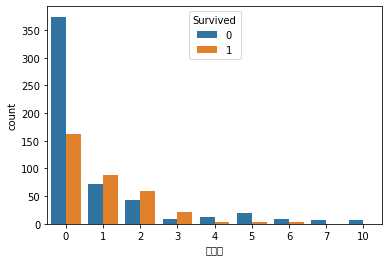

In [108]:
sns.countplot(data = train, x = train.동승자, hue = train.Survived)

In [109]:
for key, classifier in models.items() :
  X_train, X_test, y_train, y_test = train_test_split(train.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin', 'Age','SibSp','Parch','ticket'], axis = 1), train['Survived'], test_size = 0.2, random_state = 42)
  model = classifier
  model.fit(X_train, y_train)
  print(key)
  print('ACC : ', round(model.score(X_test, y_test), 4) * 100, '%')
  y_pred = model.predict(X_test)
  print('roc_auc_score : ', round(roc_auc_score(y_test,y_pred), 4) * 100, '%')
  print('recall_score : ', round(recall_score(y_test,y_pred), 4) * 100, '%')
  print('f1_score : ', round(f1_score(y_test, y_pred), 4) * 100 , '%' )
  print('-'*100)
  


Learning rate set to 0.008911
0:	learn: 0.6871865	total: 965us	remaining: 965ms
1:	learn: 0.6811306	total: 2.35ms	remaining: 1.17s
2:	learn: 0.6757940	total: 3.64ms	remaining: 1.21s
3:	learn: 0.6700683	total: 4.79ms	remaining: 1.19s
4:	learn: 0.6639215	total: 5.95ms	remaining: 1.18s
5:	learn: 0.6586858	total: 7.21ms	remaining: 1.2s
6:	learn: 0.6531085	total: 8.33ms	remaining: 1.18s
7:	learn: 0.6480053	total: 9.5ms	remaining: 1.18s
8:	learn: 0.6431161	total: 10.7ms	remaining: 1.18s
9:	learn: 0.6374877	total: 12.2ms	remaining: 1.21s
10:	learn: 0.6326886	total: 13.4ms	remaining: 1.21s
11:	learn: 0.6275566	total: 14.7ms	remaining: 1.21s
12:	learn: 0.6230697	total: 15.8ms	remaining: 1.2s
13:	learn: 0.6189700	total: 16.8ms	remaining: 1.18s
14:	learn: 0.6153098	total: 17.7ms	remaining: 1.16s
15:	learn: 0.6106824	total: 18.8ms	remaining: 1.16s
16:	learn: 0.6062115	total: 20ms	remaining: 1.16s
17:	learn: 0.6013190	total: 21.2ms	remaining: 1.16s
18:	learn: 0.5969105	total: 22.3ms	remaining: 1.15

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


DecisionTree
ACC :  83.24000000000001 %
roc_auc_score :  81.92 %
recall_score :  74.32 %
f1_score :  78.57 %
----------------------------------------------------------------------------------------------------
RandomForest
ACC :  84.92 %
roc_auc_score :  84.95 %
recall_score :  85.14 %
f1_score :  82.35 %
----------------------------------------------------------------------------------------------------


대부분 정확도가 올라갔다.

In [110]:
X_train, X_test, y_train, y_test = train_test_split(train.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin', 'Age','SibSp','Parch','ticket'], axis = 1), train['Survived'], test_size = 0.2, random_state = 42)
linear = LinearRegression()
linear.fit(X_train, y_train)
linear.score(X_test, y_test)

0.4376798836605938

In [111]:
import statsmodels.api as sm

X = train.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin', 'Age','SibSp','Parch','ticket'], axis = 1)
y = train['Survived']

X_constant = sm.add_constant(X)
model = sm.OLS(y, X_constant)
lin_reg = model.fit()
lin_reg.summary()


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.390
Method:                 Least Squares   F-statistic:                     82.44
Date:                Wed, 07 Jul 2021   Prob (F-statistic):           4.53e-92
Time:                        07:30:59   Log-Likelihood:                -397.90
No. Observations:                 891   AIC:                             811.8
Df Residuals:                     883   BIC:                             850.1
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3974      0.097     14.346      0.000       1.206       1.589
Pclass        -0.1633      0.020     -8.250      0.000      -0.202      -0.124
Sex           -0.5061      0.028    -17.846      0.000      -0.562      -0.450
Fare           0.0003      0.000      1.014      0.311      -0.000       0.001
Embarked      -0.0317      0.017     -1.895      0.058      -0.065       0.001
age_bin       -0.0501      0.011     -4.357      0.000      -0.073      -0.028
name_1        -0.0109      0.007     -1.471      0.142      -0.025       0.004
동승자           -0.0327      0.009     -3.735      0.000      -0.050      -0.015
==============================================================================
Omnibus:                       37.214   Durbin-Watson:                   1.922
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.970
Skew:                           0.523   Prob(JB):                     1.27e-09
Kurtosis:                       3.103   Cond. No.                         459.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

linear regression 은 잘 안맞는 것 같다.

# 사용한 칼럼 : Pclass, Sex, Fare, Embarked, age_bin, 동승자

In [117]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'age_bin', 'name_1',
       'ticket', '동승자'],
      dtype='object')

In [116]:
for key, classifier in models.items() :
  X_train, X_test, y_train, y_test = train_test_split(train.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin', 'Age','SibSp','Parch','ticket','name_1'], axis = 1), train['Survived'], test_size = 0.2, random_state = 42)
  model = classifier
  model.fit(X_train, y_train)
  print(key)
  print('ACC : ', round(model.score(X_test, y_test), 4) * 100, '%')
  y_pred = model.predict(X_test)
  print('roc_auc_score : ', round(roc_auc_score(y_test,y_pred), 4) * 100, '%')
  print('recall_score : ', round(recall_score(y_test,y_pred), 4) * 100, '%')
  print('f1_score : ', round(f1_score(y_test, y_pred), 4) * 100 , '%' )
  print('-'*100)
  

Learning rate set to 0.008911
0:	learn: 0.6871350	total: 921us	remaining: 921ms
1:	learn: 0.6814880	total: 2.22ms	remaining: 1.11s
2:	learn: 0.6757945	total: 3.27ms	remaining: 1.09s
3:	learn: 0.6702886	total: 4.13ms	remaining: 1.03s
4:	learn: 0.6642767	total: 5.09ms	remaining: 1.01s
5:	learn: 0.6595601	total: 5.74ms	remaining: 951ms
6:	learn: 0.6544488	total: 6.79ms	remaining: 963ms
7:	learn: 0.6495193	total: 7.94ms	remaining: 985ms
8:	learn: 0.6446902	total: 9.19ms	remaining: 1.01s
9:	learn: 0.6403612	total: 10.3ms	remaining: 1.02s
10:	learn: 0.6376119	total: 11.2ms	remaining: 1s
11:	learn: 0.6330259	total: 12.2ms	remaining: 1s
12:	learn: 0.6303898	total: 12.8ms	remaining: 972ms
13:	learn: 0.6261897	total: 13.6ms	remaining: 959ms
14:	learn: 0.6235256	total: 14.3ms	remaining: 937ms
15:	learn: 0.6194863	total: 15.1ms	remaining: 927ms
16:	learn: 0.6142175	total: 16ms	remaining: 925ms
17:	learn: 0.6093218	total: 16.9ms	remaining: 923ms
18:	learn: 0.6044426	total: 18ms	remaining: 932ms
19: